In [1]:
# importing all liburary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading csv file to dataframe
df = pd.read_csv(r'C:\Users\M RAJESH\Desktop\Ekeeda DS\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking sum of null values in each column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#dropping the customerID column as it is worthless for our model
df.drop('customerID',axis=1,inplace = True)

In [6]:
df.shape

(7043, 20)

In [7]:
#checking the datatype of each column
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# finding unique values as it's data type is object instead of int64
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
#finding categorical columns
l_categorical=[]
for column in df:
    if df[column].dtypes =='object':
        l_categorical.append(column) 
l_categorical

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [10]:
#finding the numerical columns
l_numerical=[]
for column in df:
    if df[column].dtypes =='int64' or df[column].dtype=='float64':
        l_numerical.append(column)
l_numerical

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [11]:
# function for uniques values of object data type columns
def unique_values_col (df):
    for column in df:
        if df[column].dtypes =='object':
            print(f'{column} : {df[column].unique()}')
unique_values_col(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [12]:
#just checking that is it typecasting or not
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [13]:
#reading the data frame that has space in the totalcharges column
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()] 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Remove rows with space in TotalCharges

In [14]:
df1 = df[df.TotalCharges != ' '] 

In [15]:
df1.shape   

(7032, 20)

In [16]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_19248\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [17]:
#finding 5point summery
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharges'>

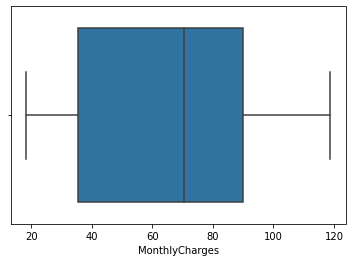

In [18]:
#box plot to check outliers
sns.boxplot(df1['MonthlyCharges'])

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure'>

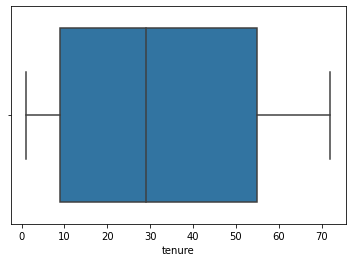

In [19]:
sns.boxplot(df1['tenure'])

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCharges'>

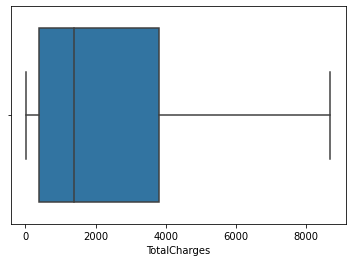

In [20]:
sns.boxplot(df1['TotalCharges'])

In [21]:
l_categorical

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

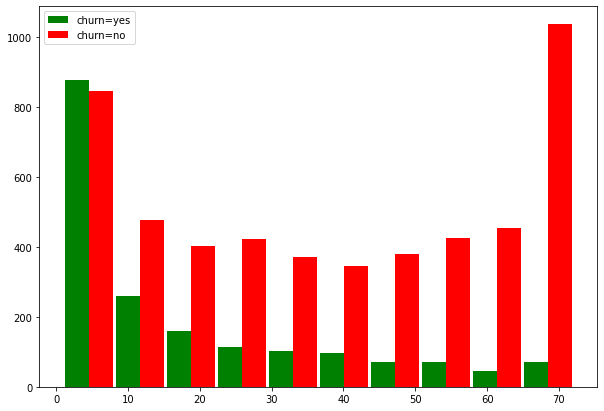

In [22]:
# visualization of target variable with tenure variable
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.figure(figsize=(10,7)) 
plt.hist([tenure_churn_yes, tenure_churn_no],rwidth=0.95 , color=['green','red'] , label=['churn=yes','churn=no'])
plt.legend() 

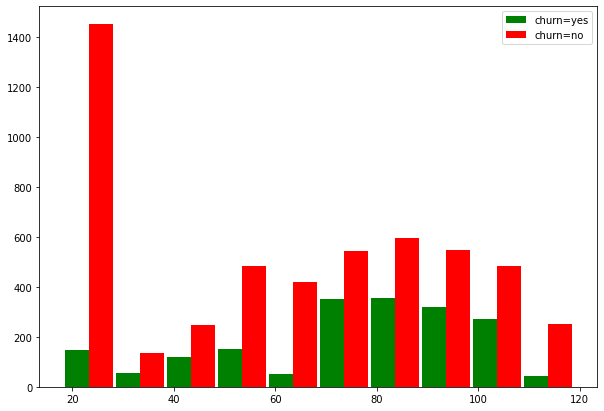

In [23]:
MonthlyCharges_churn_no = df1[df1.Churn=='No'].MonthlyCharges
MonthlyCharges_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.figure(figsize=(10,7)) 
plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no],rwidth=0.95 , color=['green','red'] , label=['churn=yes','churn=no'])
plt.legend() 

(array([[7043.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
         1109.]]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 2 BarContainer objects>)

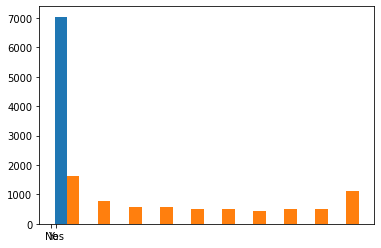

In [24]:
plt.hist([df.Churn,df.tenure])

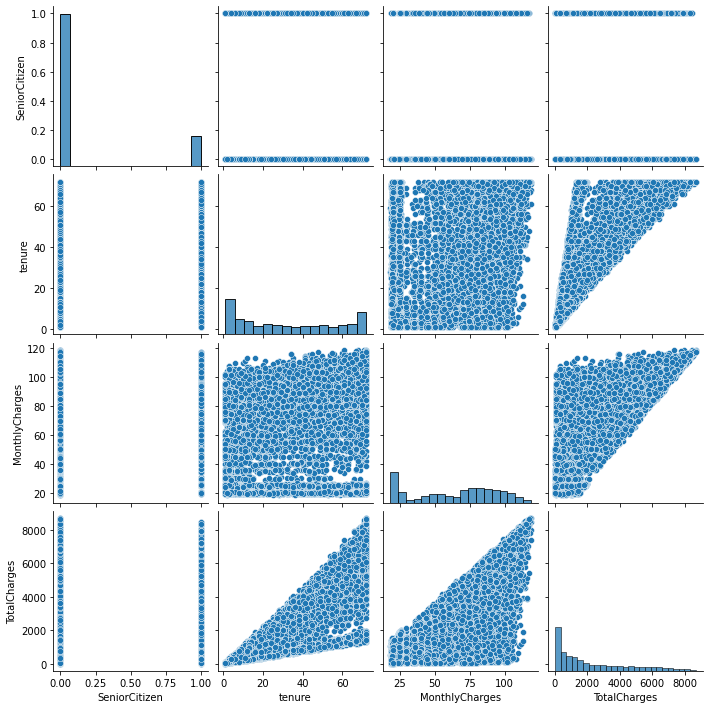

In [25]:
sns.pairplot(df1)

In [26]:
# checking the imbalance data
df1.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [27]:
1869/5163

0.36199883788495063

In [28]:
unique_values_col(df1) 

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [29]:
# replacing 'no internet service' and 'no phone service' with no
df1.replace('No internet service' , 'No',inplace = True)
df1.replace('No phone service' , 'No',inplace = True)

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_19248\75455936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service' , 'No',inplace = True)
C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_19248\75455936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service' , 'No',inplace = True)


In [30]:
unique_values_col(df1) 

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [31]:
# changing yes or no to 1 and 0
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
              'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_col:
    df1[col].replace({'Yes':1 , 'No':0},inplace=True) 

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_19248\3396002835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1 , 'No':0},inplace=True)


In [32]:
unique_values_col(df1) 

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [33]:
df1['gender'].replace({'Female':0 , 'Male':1},inplace=True)

C:\Users\M RAJESH\AppData\Local\Temp\ipykernel_19248\4002762901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':0 , 'Male':1},inplace=True)


In [34]:
df1['gender'].unique() 

array([0, 1], dtype=int64)

# one hot encoding

In [35]:
df2 = pd.get_dummies(data=df1 , columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [36]:
df2.sample(5) 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3235,0,0,0,0,61,0,0,1,1,1,...,1,0,0,0,1,0,0,1,0,0
2975,1,0,0,0,3,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
6619,0,0,0,0,9,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2918,1,1,1,0,8,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,1
5619,0,1,1,0,20,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [38]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [39]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [40]:
for i in df2.columns:
    print(f'{i} : {df2[i].unique()} ') 

gender : [0 1] 
SeniorCitizen : [0 1] 
Partner : [1 0] 
Dependents : [0 1] 
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127] 
PhoneService : [0 1] 
MultipleLines : [0 1] 
OnlineSecurity : [0 1] 
OnlineBackup : [1 0] 
DeviceProtection : [

#treating Imbalance data

In [41]:
# down sampling
count_class_0 , count_class_1 = df2['Churn'].value_counts()
df2_class_0 = df2[df2['Churn']==0]
df2_class_1 = df2[df2['Churn']==1]

In [42]:
count_class_0 , count_class_1

(5163, 1869)

In [43]:
df_test_under  = pd.concat([df2_class_0.sample(count_class_1) , df2_class_1] , axis=0) 

In [44]:
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [45]:
# upsampling
df_class_1_over = df2_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df2_class_0, df_class_1_over], axis=0)
df_test_over.Churn.value_counts() 

0    5163
1    5163
Name: Churn, dtype: int64

In [46]:
from imblearn.combine import SMOTEENN
smot = SMOTEENN() 
x_sm,y_sm = smot.fit_resample(df2.drop('Churn',axis=1),df2.Churn)

In [47]:
x_sm.shape

(6149, 26)

In [48]:
y_sm.shape

(6149,)

In [49]:
x=df2.drop('Churn',axis=1)
y=df2.Churn

# Train test split

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=0)

In [51]:
len(X_train),len(X_test)

(4919, 1230)

In [52]:
X_train.shape

(4919, 26)

# building the models and finding the best model out off them 

#logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
g_log=GridSearchCV(LogisticRegression(),{
    'C':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
})
g_log.fit(x_sm,y_sm)


C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16]})

In [54]:
g_log.best_params_

{'C': 15}

In [55]:
log_reg = LogisticRegression(C=15)

In [56]:
log_reg.fit(X_train,y_train)

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=15)

In [57]:
y_pred_log_reg = log_reg.predict(X_test)

In [58]:
y_pred_log_reg

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
accuracy_score(y_test,y_pred_log_reg)

0.9292682926829269

In [61]:
cm_log=confusion_matrix(y_test,y_pred_log_reg)

[[497  40]
 [ 47 646]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       537
           1       0.94      0.93      0.94       693

    accuracy                           0.93      1230
   macro avg       0.93      0.93      0.93      1230
weighted avg       0.93      0.93      0.93      1230



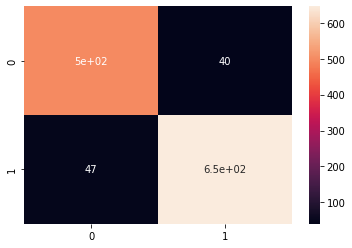

In [62]:
print(cm_log)
print(sns.heatmap(cm_log, annot=True))
print(classification_report(y_test,y_pred_log_reg))

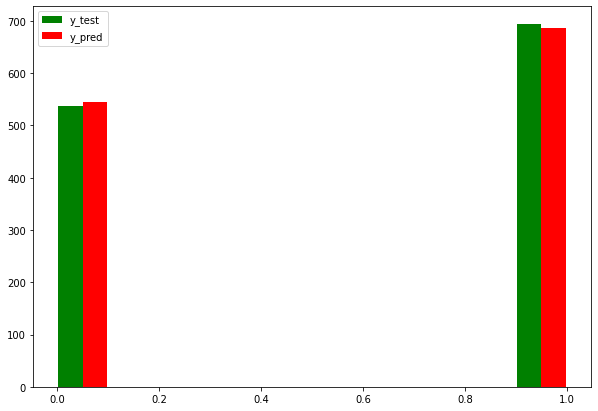

In [63]:
plt.figure(figsize=(10,7))
plt.hist([y_test,y_pred_log_reg],rwidth=0.95 , color=['green','red'] , label=['y_test','y_pred'])
plt.legend() 

#decession tree classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
g_dtc=GridSearchCV(DecisionTreeClassifier(),{
    "criterion":['gini', 'entropy','log_loss'],"splitter":["best", 'random']
    })
g_dtc.fit(x_sm,y_sm)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [65]:
g_dtc.best_params_

{'criterion': 'log_loss', 'splitter': 'random'}

In [66]:
dtc=DecisionTreeClassifier(criterion='gini',splitter='random')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(splitter='random')

In [67]:
y_pred_dtc = dtc.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred_dtc)

0.9471544715447154

In [69]:
cm_dtc = confusion_matrix(y_test,y_pred_dtc)

[[500  37]
 [ 28 665]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       537
           1       0.95      0.96      0.95       693

    accuracy                           0.95      1230
   macro avg       0.95      0.95      0.95      1230
weighted avg       0.95      0.95      0.95      1230



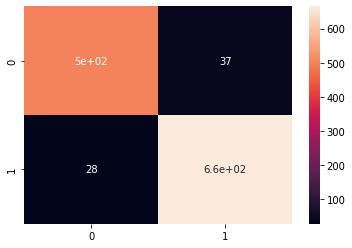

In [70]:
print(cm_dtc)
print(sns.heatmap(cm_dtc,annot=True))
print(classification_report(y_test,y_pred_dtc))

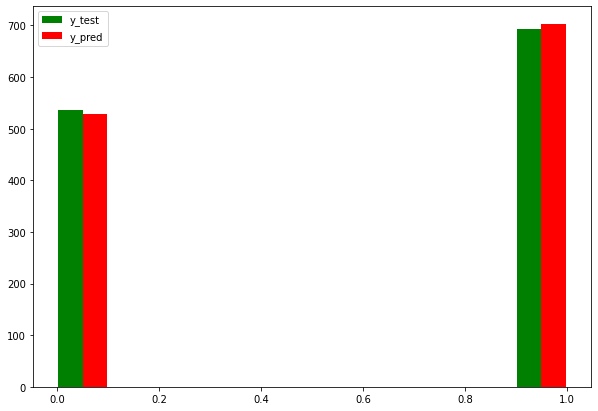

In [71]:
plt.figure(figsize=(10,7))
plt.hist([y_test,y_pred_dtc],rwidth=0.95 , color=['green','red'] , label=['y_test','y_pred'])
plt.legend()

#KNN Classifier

In [72]:
#choosing k value

In [73]:
from sklearn.neighbors import KNeighborsClassifier
g_knn=GridSearchCV(KNeighborsClassifier(),{
    "n_neighbors":[1,2,3,4.5,6,7,8,9,10],'weights':['uniform','distance']
})
g_knn.fit(x_sm,y_sm)

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 605, in _fit
    raise TypeError(
TypeError: n_neighbors does not take <class '

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4.5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [74]:
g_knn.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [75]:
error = [] 
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

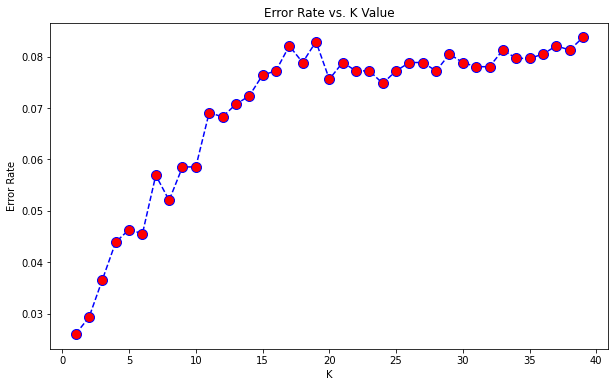

In [76]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [77]:
m = error.index(min(error))

In [78]:
# k =34 is the best value for knn 
knn_0 = KNeighborsClassifier(n_neighbors=m+1,weights='uniform')
knn_0.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [79]:
y_pred_knn = knn_0.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred_knn)

0.9739837398373984

In [81]:
cm_knn = confusion_matrix(y_test,y_pred_knn)

[[511  26]
 [  6 687]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       537
           1       0.96      0.99      0.98       693

    accuracy                           0.97      1230
   macro avg       0.98      0.97      0.97      1230
weighted avg       0.97      0.97      0.97      1230



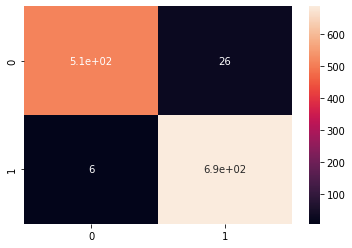

In [82]:
print(cm_knn) 
print(sns.heatmap(cm_knn , annot=True))
print(classification_report(y_test,y_pred_knn))

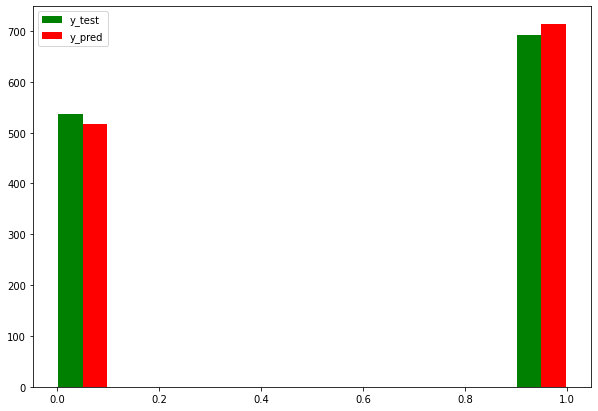

In [83]:
plt.figure(figsize=(10,7))
plt.hist([y_test,y_pred_knn],rwidth=0.95 , color=['green','red'] , label=['y_test','y_pred'])
plt.legend()

#Naive bayes

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
y_pred_GNB = GNB.predict(X_test) 

In [86]:
accuracy_score(y_test,y_pred_GNB)

0.9048780487804878

In [87]:
cm_GNB = confusion_matrix(y_test,y_pred_GNB)

[[499  38]
 [ 79 614]]
AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       537
           1       0.94      0.89      0.91       693

    accuracy                           0.90      1230
   macro avg       0.90      0.91      0.90      1230
weighted avg       0.91      0.90      0.91      1230



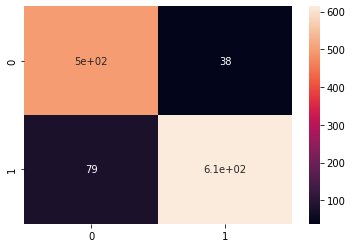

In [88]:
print(cm_GNB)
print(sns.heatmap(cm_GNB , annot=True))
print(classification_report(y_test,y_pred_GNB) )

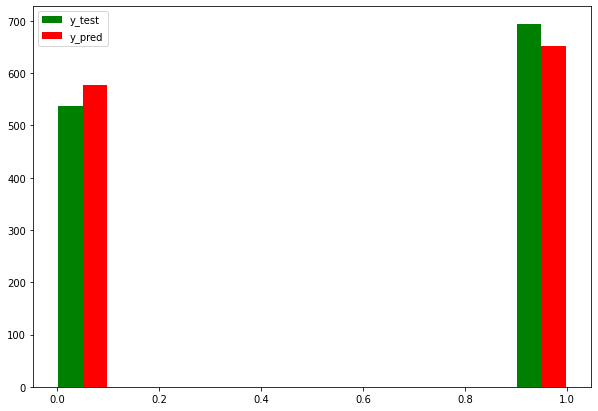

In [89]:
plt.figure(figsize=(10,7))
plt.hist([y_test,y_pred_GNB],rwidth=0.95 , color=['green','red'] , label=['y_test','y_pred'])
plt.legend()

#out off all these classifiers KNN Classifier gives more accuracy i.e. 98% by using smoteenn as imbalance data treatment